In [3]:
from zipfile import ZipFile
import os

# Define the path to the uploaded zip file and the extraction directory
zip_file_path = 'Airline_review.csv.zip'

# Read the csv file inside the zip file without extracting the file into the file system
import pandas as pd
with ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open('Airline_review.csv') as file:
        df = pd.read_csv(file)
        


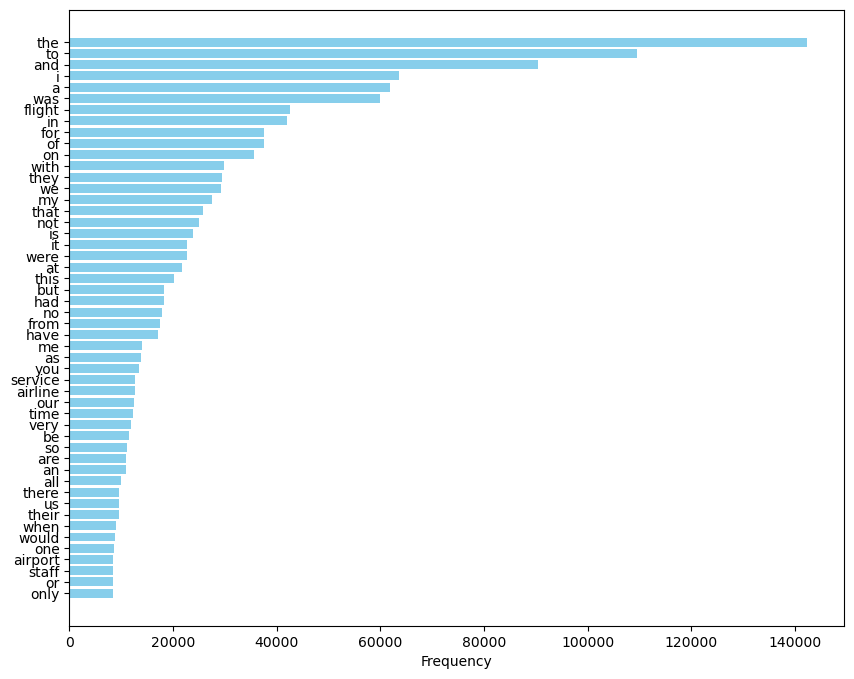

In [4]:
# Since the review column is identified, let's proceed with the analysis
review_column = 'Review'

# Combine all reviews into a single string
all_reviews = ' '.join(df[review_column].dropna())

import re
from collections import Counter

# Clean the text: remove punctuation and numbers, make lowercase
all_reviews = re.sub('[^a-zA-Z\s]', '', all_reviews).lower()

# Split the string into words
all_words = all_reviews.split()

# Count the frequency of each word
word_counts = Counter(all_words)

# Prepare data for plotting again
words, frequencies = zip(*word_counts.most_common(50))
y_pos = range(len(words))

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh(y_pos, frequencies, color='skyblue')
plt.yticks(y_pos, words)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.xlabel('Frequency')
#plt.title('Top 30 Most Common Words in Airline Reviews')
plt.show()


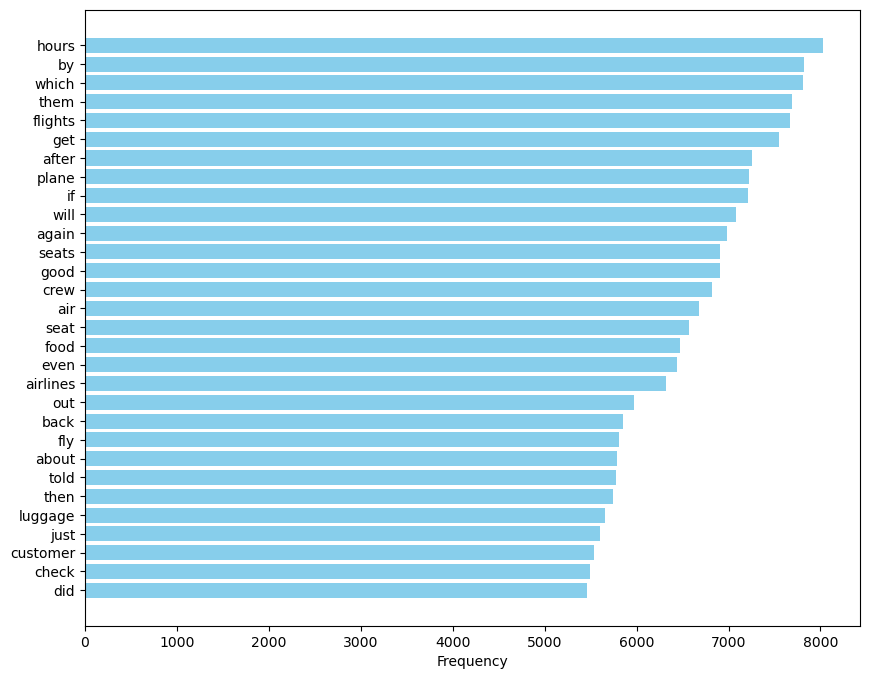

In [3]:
# plot again but exclude the top 50 most common words and plot the top 50-100 most common words
words, frequencies = zip(*word_counts.most_common(80)[50:])
y_pos = range(len(words))
plt.figure(figsize=(10, 8))
plt.barh(y_pos, frequencies, color='skyblue')
plt.yticks(y_pos, words)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.xlabel('Frequency')
# save plot to file ../img/airline-review-excluded-top-50.png
plt.savefig('../img/airline-review-excluded-top-50.png')
plt.show()


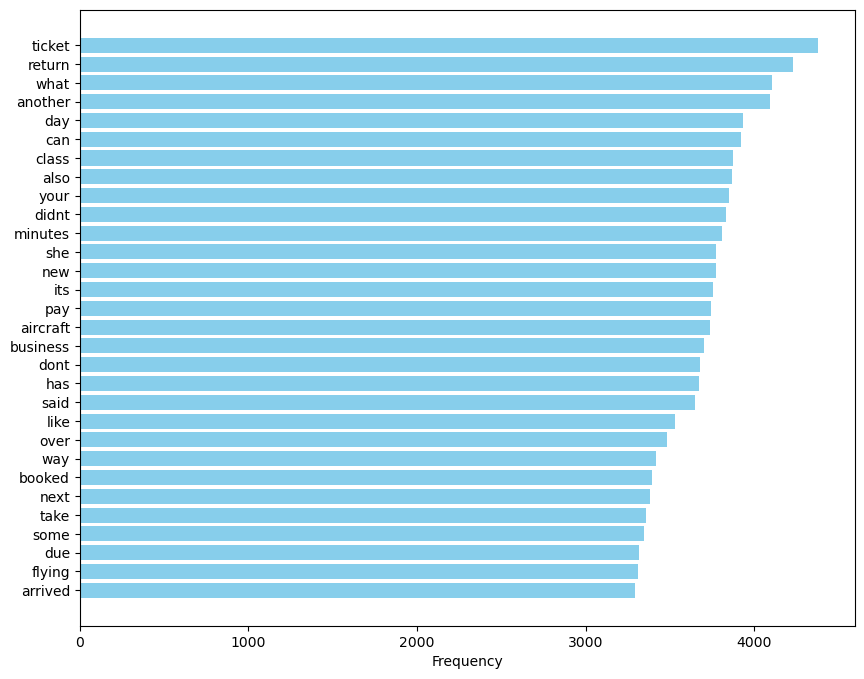

In [4]:
# plot again but exclude the top 50 most common words and plot the top 50-100 most common words
words, frequencies = zip(*word_counts.most_common(130)[100:])
y_pos = range(len(words))
plt.figure(figsize=(10, 8))
plt.barh(y_pos, frequencies, color='skyblue')
plt.yticks(y_pos, words)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.xlabel('Frequency')
# save plot to file ../img/airline-review-excluded-top-50.png
plt.savefig('../img/airline-review-excluded-top-100.png')
plt.show()


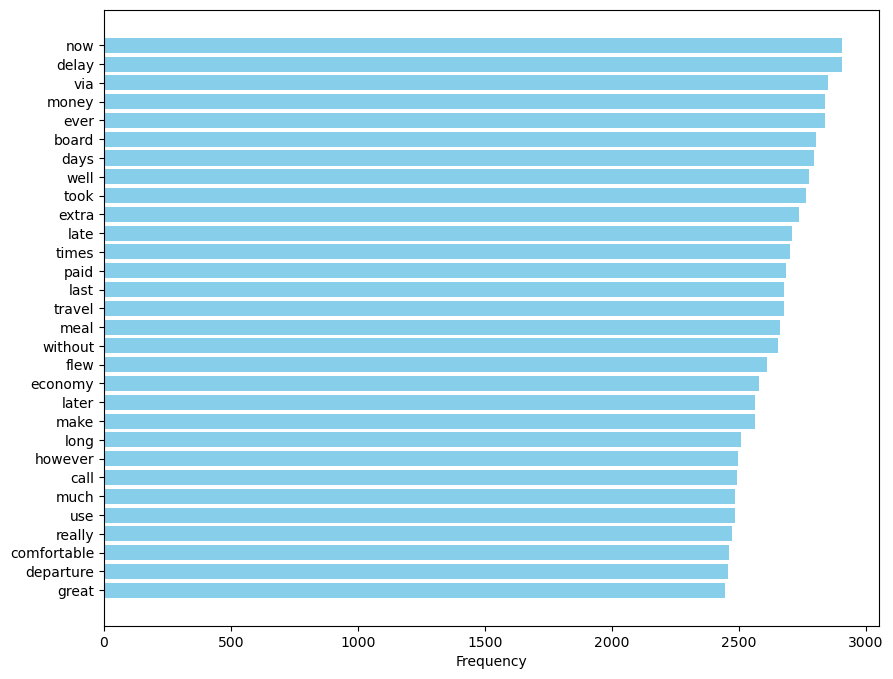

In [5]:
# plot again but exclude the top 50 most common words and plot the top 50-100 most common words
words, frequencies = zip(*word_counts.most_common(180)[150:])
y_pos = range(len(words))
plt.figure(figsize=(10, 8))
plt.barh(y_pos, frequencies, color='skyblue')
plt.yticks(y_pos, words)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.xlabel('Frequency')
# save plot to file ../img/airline-review-excluded-top-50.png
plt.savefig('../img/airline-review-excluded-top-150.png')
plt.show()


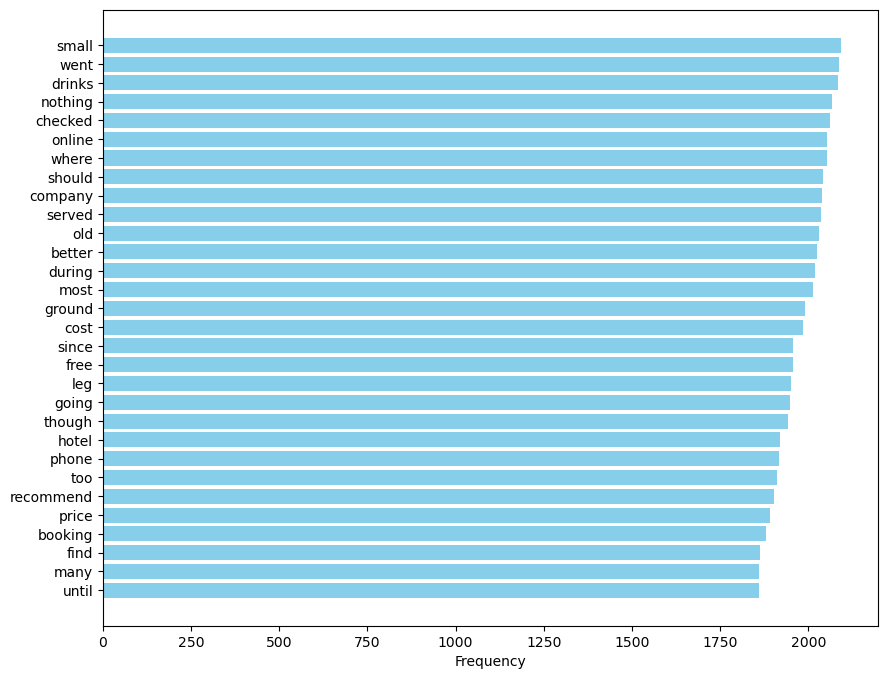

In [6]:
# again but with the top 200-230 most common words
words, frequencies = zip(*word_counts.most_common(230)[200:])
y_pos = range(len(words))
plt.figure(figsize=(10, 8))
plt.barh(y_pos, frequencies, color='skyblue')
plt.yticks(y_pos, words)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.xlabel('Frequency')
# save plot to file ../img/airline-review-excluded-top-50.png
plt.savefig('../img/airline-review-excluded-top-200.png')
plt.show()

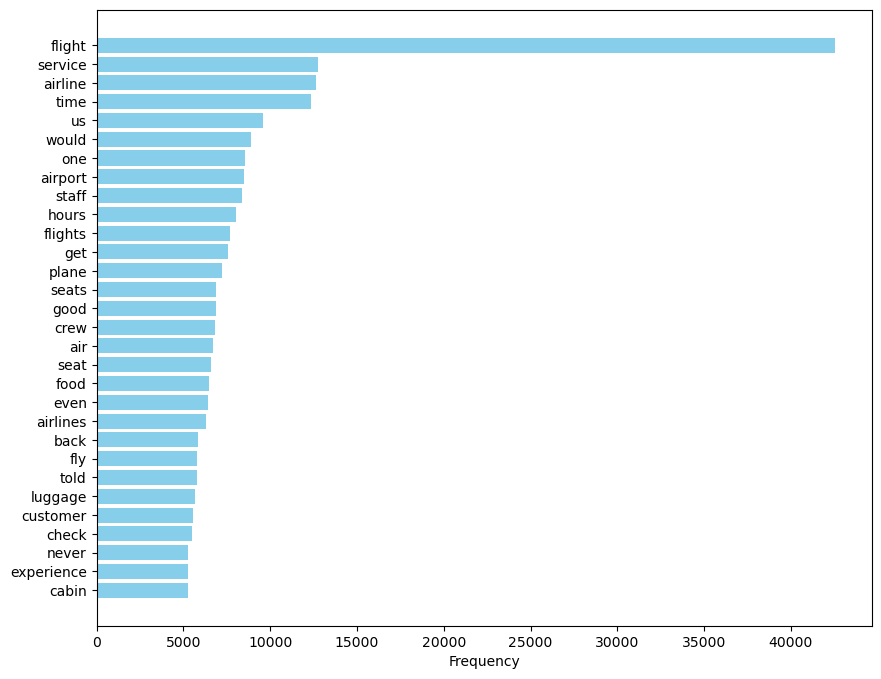

In [5]:
# Manually define a basic set of English stopwords
manual_stop_words = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 
    'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 
    'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 
    'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
    'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 
    'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 
    'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', 
    "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', 
    "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
}

# Remove manually defined stopwords from the list of words
filtered_words_manual = [word for word in all_words if word not in manual_stop_words]

# Count the frequency of each word again
filtered_word_counts_manual = Counter(filtered_words_manual)

# Get the top 30 most common words after removing manual stopwords
top_30_words_manual = filtered_word_counts_manual.most_common(30)

# Prepare data for plotting again
words_manual, frequencies_manual = zip(*top_30_words_manual)
y_pos_manual = range(len(words_manual))

# Plot again
plt.figure(figsize=(10, 8))
plt.barh(y_pos_manual, frequencies_manual, color='skyblue')
plt.yticks(y_pos_manual, words_manual)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.xlabel('Frequency')
#plt.title('Top 30 Most Common Words in Airline Reviews (excluding manual stopwords)')
plt.show()


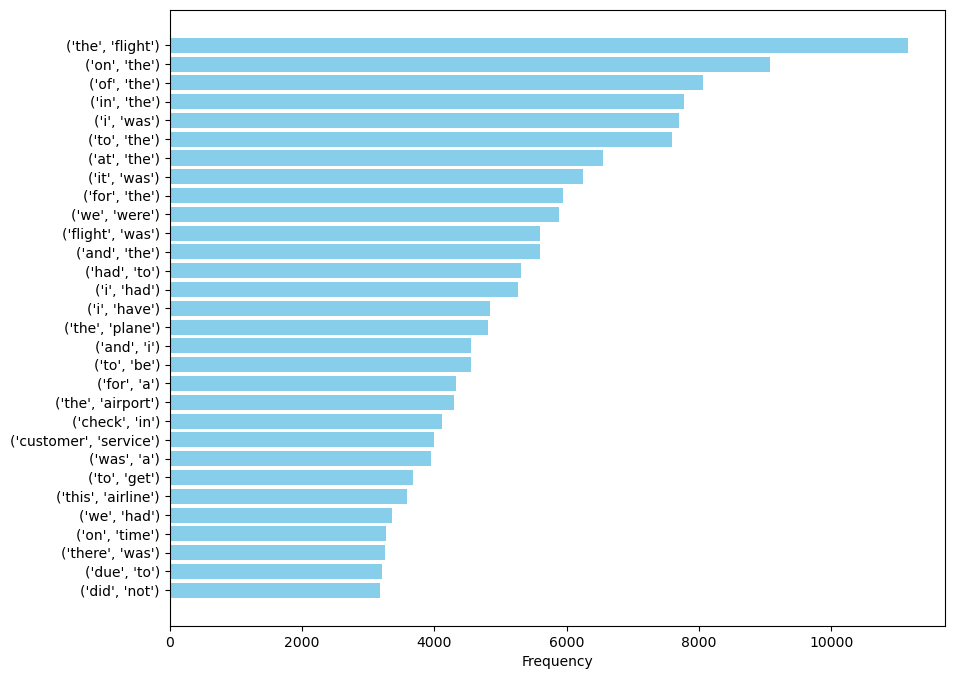

In [8]:
# get all bigrams from all_words
bigrams = list(zip(all_words, all_words[1:]))
bigram_counts = Counter(bigrams)

# Get the top 30 most common bigrams
top_30_bigrams = bigram_counts.most_common(30)

# Prepare data for plotting
bigram, frequencies = zip(*top_30_bigrams)
y_pos = range(len(bigram))

# Plot again
plt.figure(figsize=(10, 8))
plt.barh(y_pos, frequencies, color='skyblue')
plt.yticks(y_pos, bigram)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.xlabel('Frequency')

# plt.savefig('../img/airline-review-bigram.png')
#plt.title('Top 30 Most Common Words in Airline Reviews (excluding manual stopwords)')
plt.show()

In [6]:

# remove bigrams that contain at least one stopword
filtered_bigrams = [bigram for bigram in bigrams if not any(word in manual_stop_words for word in bigram)]
filtered_bigram_counts = Counter(filtered_bigrams)

# Get the top 30 most common bigrams after removing bigrams with stopwords
top_30_filtered_bigrams = filtered_bigram_counts.most_common(30)

# Prepare data for plotting
bigram, frequencies = zip(*top_30_filtered_bigrams)
y_pos = range(len(bigram))

# Plot again
plt.figure(figsize=(10, 8))
plt.barh(y_pos, frequencies, color='skyblue')
plt.yticks(y_pos, bigram)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.xlabel('Frequency')
#plt.savefig('../img/airline-review-bigram-no-stopwords.png')
plt.show()


NameError: name 'bigrams' is not defined

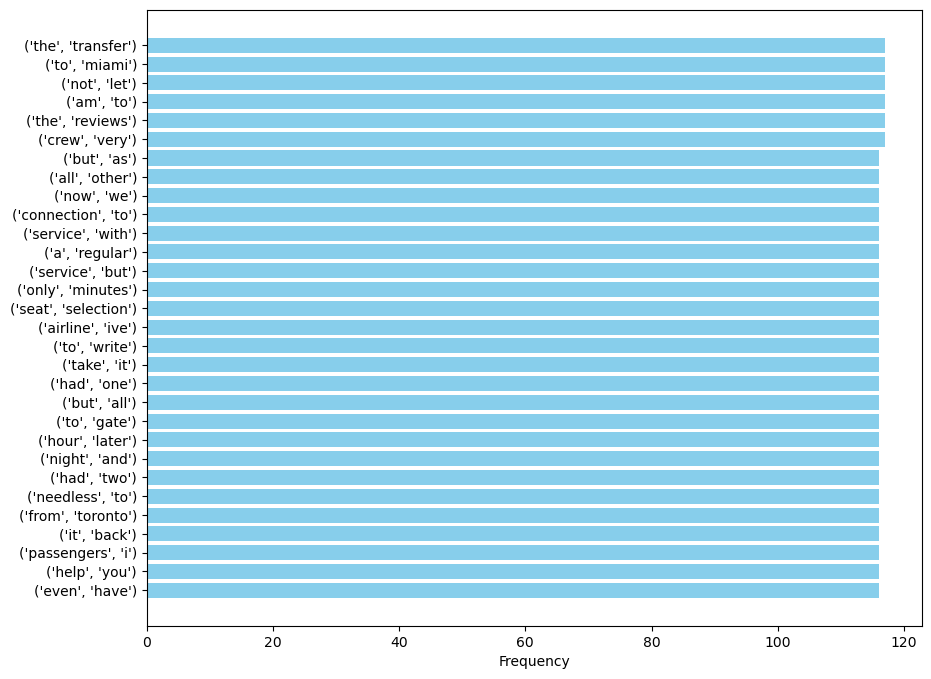

In [17]:
# get all bigrams from all_words
bigrams = list(zip(all_words, all_words[1:]))
bigram_counts = Counter(bigrams)

exclude = 3000
top_130_bigrams = bigram_counts.most_common(exclude+30)[exclude:]

# Prepare data for plotting
bigram, frequencies = zip(*top_130_bigrams)
y_pos = range(len(bigram))

# Plot again
plt.figure(figsize=(10, 8))
plt.barh(y_pos, frequencies, color='skyblue')
plt.yticks(y_pos, bigram)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.xlabel('Frequency')

plt.savefig('../img/airline-review-bigram-no-top100.png')
plt.show()

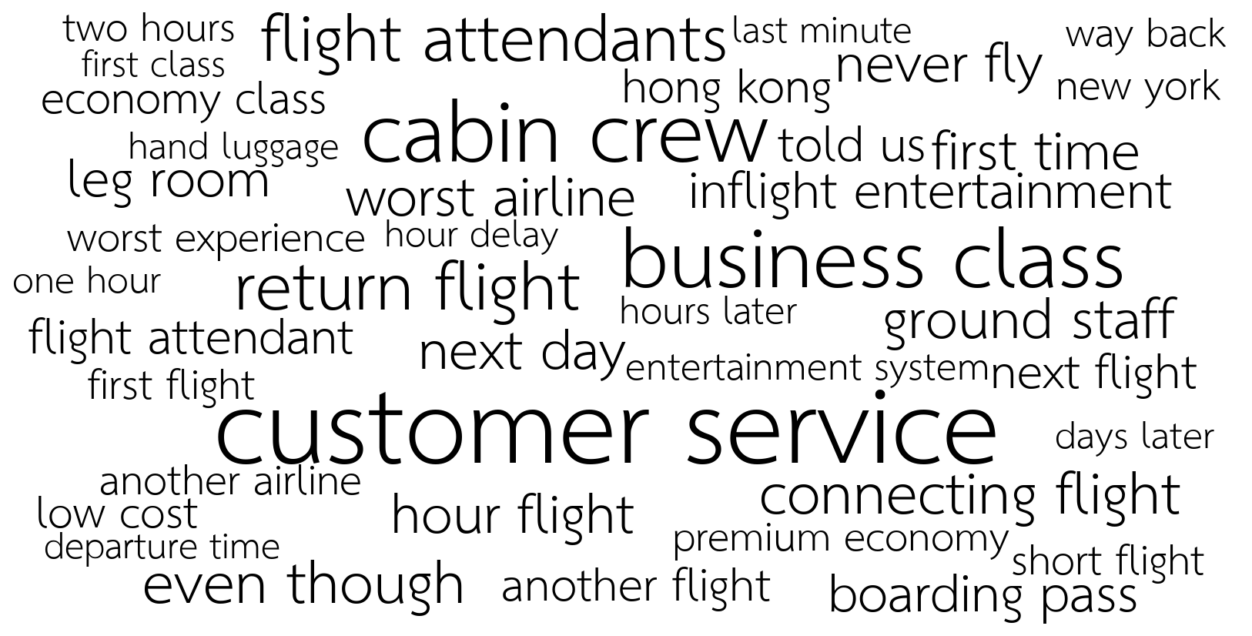

In [28]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    width = 1600,
    height = 800,
    max_font_size = 200,
    prefer_horizontal = 1,
    background_color = 'white',
    font_path='THSarabun.ttf',
    color_func = lambda *args, **kwargs: "black",
    random_state=44
)

filtered_bigrams = [' '.join(bigram) for bigram in bigrams if not any(word in manual_stop_words for word in bigram)]
filtered_bigram_counts = Counter(filtered_bigrams)

# Only use the 30 most common words
filtered_bigram_counts = dict(filtered_bigram_counts.most_common(40))


swc = wordcloud.generate_from_frequencies(filtered_bigram_counts)
plt.figure(figsize=(16, 8))
plt.imshow(swc, interpolation='bilinear')
plt.axis('off')
plt.savefig('../img/airline-review-bigram-wordcloud.png')
plt.show()
